In [255]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [257]:
df = pd.read_csv("./loan/Loan_Default.csv") 

In [258]:
df.drop("ID", axis=1, inplace=True)

In [261]:
age_map = {
    '<25': 1, '25-34': 2, '35-44': 3, '45-54': 4,
    '55-64': 5, '65-74': 6, '>74': 7
}
df['age'] = df['age'].map(age_map)
df['age'].fillna(df['age'].median(), inplace=True)

/var/folders/5j/21g__tmn49j37fc_6jm0546c0000gn/T/ipykernel_5481/437250868.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [263]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)


/var/folders/5j/21g__tmn49j37fc_6jm0546c0000gn/T/ipykernel_5481/815428542.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [265]:
X = df.drop(['Status', 'Interest_rate_spread'], axis=1)

y = df["Status"]

In [267]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [269]:
for col in X_train.select_dtypes(include='object').columns:
    X_train[col] = X_train[col].astype("category").cat.codes
    X_test[col] = X_test[col].astype("category").cat.codes

In [271]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [273]:
y_pred = model.predict(X_test)

In [275]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9974776350306047

Confusion Matrix:
 [[22331    75]
 [    0  7328]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22406
           1       0.99      1.00      0.99      7328

    accuracy                           1.00     29734
   macro avg       0.99      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



In [249]:
# Check if any rows in X_test are in X_train
common_rows = X_train.merge(X_test, how='inner')
print(f"Overlap in train/test: {common_rows.shape[0]} rows")


Overlap in train/test: 0 rows


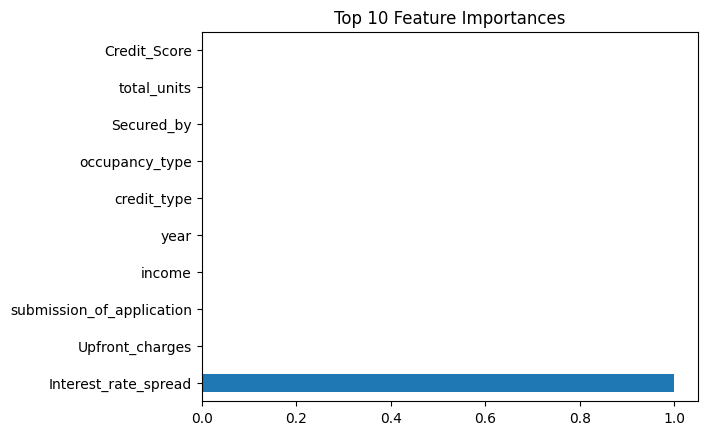

In [251]:
import matplotlib.pyplot as plt
pd.Series(model.feature_importances_, index=X_train.columns)\
    .sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()


<Axes: xlabel='Status', ylabel='Credit_Score'>

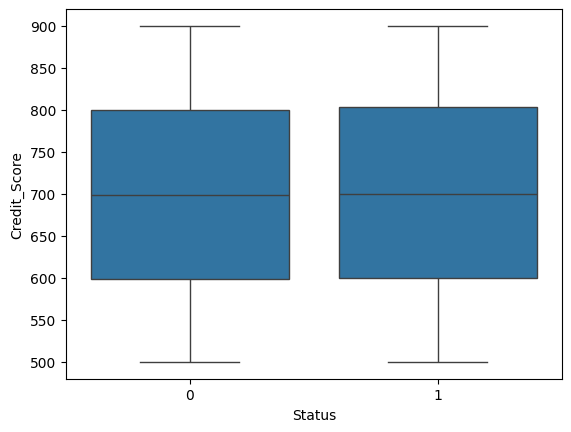

In [253]:
import seaborn as sns
sns.boxplot(data=df, x='Status', y='Credit_Score')
